# Importing the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from nltk.corpus import stopwords
import re, string
from symspellpy import SymSpell, Verbosity
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score
from xgboost import XGBClassifier
import xgboost as xgb
from wordcloud import WordCloud

# Loading the training and test datasets

In [2]:
train = pd.read_csv('train.csv')
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [3]:
test = pd.read_csv('test.csv')
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


# Text Cleaning and Preprocessing

In [4]:
train['keyword'] = train['keyword'].apply(lambda x: str.lower(x) if pd.isna(x) != True else x)
train['location'] = train['location'].apply(lambda x: str.lower(x) if pd.isna(x) != True else x)
train['text'] = train['text'].apply(lambda x: str.lower(x) if pd.isna(x) != True else x)
test['keyword'] = test['keyword'].apply(lambda x: str.lower(x) if pd.isna(x) != True else x)
test['location'] = test['location'].apply(lambda x: str.lower(x) if pd.isna(x) != True else x)
test['text'] = test['text'].apply(lambda x: str.lower(x) if pd.isna(x) != True else x)

In [5]:
def text_process(text):
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english') and not word.isdigit()])

In [6]:
train['keyword'] = train['keyword'].apply(lambda x: text_process(x) if pd.isna(x) != True else x)
train['location'] = train['location'].apply(lambda x: text_process(x) if pd.isna(x) != True else x)
train['text'] = train['text'].apply(lambda x: text_process(x) if pd.isna(x) != True else x)
test['keyword'] = test['keyword'].apply(lambda x: text_process(x) if pd.isna(x) != True else x)
test['location'] = test['location'].apply(lambda x: text_process(x) if pd.isna(x) != True else x)
test['text'] = test['text'].apply(lambda x: text_process(x) if pd.isna(x) != True else x)

In [7]:
train['keyword'] = train['keyword'].apply(lambda x: re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', " ", x) if pd.isna(x) != True else x)
train['location'] = train['location'].apply(lambda x: re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', " ", x) if pd.isna(x) != True else x)
train['text'] = train['text'].apply(lambda x: re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', " ", x) if pd.isna(x) != True else x)
test['keyword'] = test['keyword'].apply(lambda x: re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', " ", x) if pd.isna(x) != True else x)
test['location'] = test['location'].apply(lambda x: re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', " ", x) if pd.isna(x) != True else x)
test['text'] = test['text'].apply(lambda x: re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', " ", x) if pd.isna(x) != True else x)

In [8]:
sym_spell = SymSpell()
def spelling_correction(text):
    correct_spellings = []
    for token in text.split():
        x = sym_spell.lookup(token,Verbosity.CLOSEST,max_edit_distance=2,include_unknown=True)[0].__str__()
        y = x.split(',')[0]
        correct_spellings.append(y)
    return ' '.join(correct_spellings)

In [9]:
train['keyword'] = train['keyword'].apply(lambda x: spelling_correction(x) if pd.isna(x) != True else x)
train['location'] = train['location'].apply(lambda x: spelling_correction(x) if pd.isna(x) != True else x)
train['text'] = train['text'].apply(lambda x: spelling_correction(x) if pd.isna(x) != True else x)
test['keyword'] = test['keyword'].apply(lambda x: spelling_correction(x) if pd.isna(x) != True else x)
test['location'] = test['location'].apply(lambda x: spelling_correction(x) if pd.isna(x) != True else x)
test['text'] = test['text'].apply(lambda x: spelling_correction(x) if pd.isna(x) != True else x)

In [10]:
stemmer = PorterStemmer()

def stem_words(text):
    return ' '.join([stemmer.stem(word) for word in text.split()])

train['keyword'] = train['keyword'].apply(lambda x: stem_words(x) if pd.isna(x) != True else x)
train['location'] = train['location'].apply(lambda x: stem_words(x) if pd.isna(x) != True else x)
train['text'] = train['text'].apply(lambda x: stem_words(x) if pd.isna(x) != True else x)
test['keyword'] = test['keyword'].apply(lambda x: stem_words(x) if pd.isna(x) != True else x)
test['location'] = test['location'].apply(lambda x: stem_words(x) if pd.isna(x) != True else x)
test['text'] = test['text'].apply(lambda x: stem_words(x) if pd.isna(x) != True else x)

In [11]:
lemmatizer = WordNetLemmatizer()

def lemmatize_words(text):
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])

train['keyword'] = train['keyword'].apply(lambda x: lemmatize_words(x) if pd.isna(x) != True else x)
train['location'] = train['location'].apply(lambda x: lemmatize_words(x) if pd.isna(x) != True else x)
train['text'] = train['text'].apply(lambda x: lemmatize_words(x) if pd.isna(x) != True else x)
test['keyword'] = test['keyword'].apply(lambda x: lemmatize_words(x) if pd.isna(x) != True else x)
test['location'] = test['location'].apply(lambda x: lemmatize_words(x) if pd.isna(x) != True else x)
test['text'] = test['text'].apply(lambda x: lemmatize_words(x) if pd.isna(x) != True else x)

In [12]:
for col in train.columns:
    print("% of null values in {} =".format(col),str(np.round(train[col].isnull().sum()/len(train[col]),2)) + '%')

% of null values in id = 0.0%
% of null values in keyword = 0.01%
% of null values in location = 0.33%
% of null values in text = 0.0%
% of null values in target = 0.0%


In [13]:
train['location'].fillna('Unavailable',inplace=True)
test['location'].fillna('Unavailable',inplace=True)

In [14]:
train['keyword']=train['keyword'].fillna('None')
test['keyword']=test['keyword'].fillna('None')

# Exploratory Data Analysis

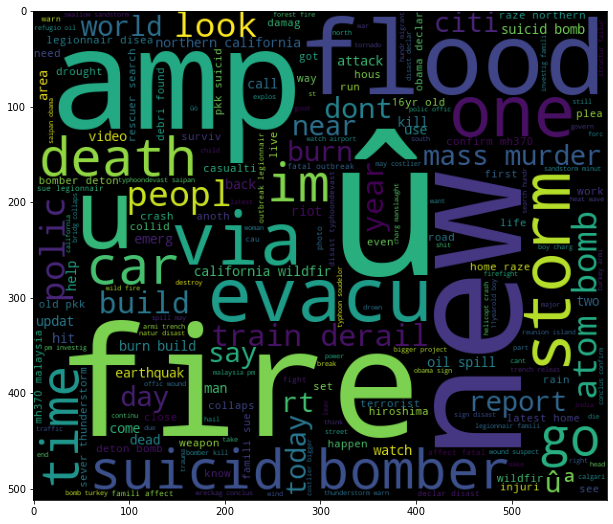

In [15]:
disaster_tweets = ' '.join(list(train[train['target'] == 1]['text']))
data_wc = WordCloud(width = 600, height = 512).generate(disaster_tweets)
plt.figure(figsize = (13, 9))
plt.imshow(data_wc)
plt.show()

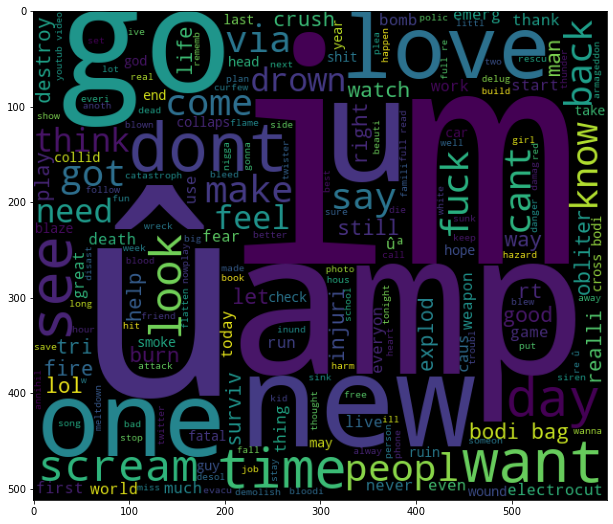

In [16]:
non_disaster_tweets = ' '.join(list(train[train['target'] == 0]['text']))
data_wc = WordCloud(width = 600, height = 512).generate(non_disaster_tweets)
plt.figure(figsize = (13, 9))
plt.imshow(data_wc)
plt.show()

<AxesSubplot:xlabel='target', ylabel='count'>

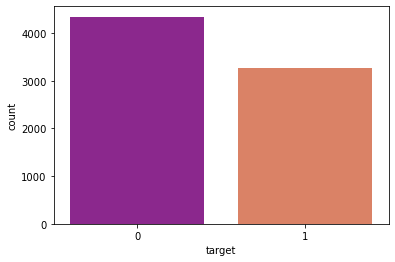

In [17]:
sns.countplot(train['target'],palette='plasma')

# Text Vectorization and Normalization

In [18]:
vectorizer = CountVectorizer()

bow_text = vectorizer.fit_transform(train.text)
bow_text_test = vectorizer.transform(test.text)
bow_text

<7613x18866 sparse matrix of type '<class 'numpy.int64'>'
	with 72139 stored elements in Compressed Sparse Row format>

# Model Training and Evaluation

In [19]:
text_train, text_test, target_train, target_test = train_test_split(bow_text,train['target'],test_size=0.35)

In [20]:
mnb = MultinomialNB()
mnb.fit(text_train,target_train)

MultinomialNB()

In [21]:
predictions = mnb.predict(text_test)
predictions

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [22]:
print(confusion_matrix(target_test,predictions))
print(classification_report(target_test,predictions))

[[1336  225]
 [ 306  798]]
              precision    recall  f1-score   support

           0       0.81      0.86      0.83      1561
           1       0.78      0.72      0.75      1104

    accuracy                           0.80      2665
   macro avg       0.80      0.79      0.79      2665
weighted avg       0.80      0.80      0.80      2665



In [23]:
param_grid = {'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 0.00001]}  

In [24]:
grid_search = GridSearchCV(MultinomialNB(),param_grid,refit=True,verbose=3)
grid_search.fit(text_train,target_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ...........................alpha=1;, score=0.788 total time=   0.0s
[CV 2/5] END ...........................alpha=1;, score=0.796 total time=   0.0s
[CV 3/5] END ...........................alpha=1;, score=0.798 total time=   0.0s
[CV 4/5] END ...........................alpha=1;, score=0.791 total time=   0.0s
[CV 5/5] END ...........................alpha=1;, score=0.770 total time=   0.0s
[CV 1/5] END .........................alpha=0.1;, score=0.766 total time=   0.0s
[CV 2/5] END .........................alpha=0.1;, score=0.782 total time=   0.0s
[CV 3/5] END .........................alpha=0.1;, score=0.779 total time=   0.0s
[CV 4/5] END .........................alpha=0.1;, score=0.787 total time=   0.0s
[CV 5/5] END .........................alpha=0.1;, score=0.762 total time=   0.0s
[CV 1/5] END ........................alpha=0.01;, score=0.761 total time=   0.0s
[CV 2/5] END ........................alpha=0.01;,

GridSearchCV(estimator=MultinomialNB(),
             param_grid={'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 1e-05]},
             verbose=3)

In [25]:
grid_search.best_score_

0.7885982167478629

In [26]:
optimized_mnb = grid_search.predict(text_test)
optimized_mnb

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [27]:
print(confusion_matrix(target_test,optimized_mnb))
print(classification_report(target_test,optimized_mnb))

[[1336  225]
 [ 306  798]]
              precision    recall  f1-score   support

           0       0.81      0.86      0.83      1561
           1       0.78      0.72      0.75      1104

    accuracy                           0.80      2665
   macro avg       0.80      0.79      0.79      2665
weighted avg       0.80      0.80      0.80      2665



In [28]:
logmodel = LogisticRegression()
logmodel.fit(text_train,target_train)

LogisticRegression()

In [29]:
lr_pred = logmodel.predict(text_test)
lr_pred

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [30]:
print(confusion_matrix(target_test,lr_pred))
print(classification_report(target_test,lr_pred))

[[1348  213]
 [ 335  769]]
              precision    recall  f1-score   support

           0       0.80      0.86      0.83      1561
           1       0.78      0.70      0.74      1104

    accuracy                           0.79      2665
   macro avg       0.79      0.78      0.78      2665
weighted avg       0.79      0.79      0.79      2665



In [31]:
rfc = RandomForestClassifier(n_estimators=2)
rfc.fit(text_train,target_train)

RandomForestClassifier(n_estimators=2)

In [32]:
rfc_pred = rfc.predict(text_test)
rfc_pred

array([0, 0, 1, ..., 1, 1, 0], dtype=int64)

In [33]:
print(confusion_matrix(target_test,rfc_pred))
print(classification_report(target_test,rfc_pred))

[[1431  130]
 [ 636  468]]
              precision    recall  f1-score   support

           0       0.69      0.92      0.79      1561
           1       0.78      0.42      0.55      1104

    accuracy                           0.71      2665
   macro avg       0.74      0.67      0.67      2665
weighted avg       0.73      0.71      0.69      2665



In [34]:
dtree = DecisionTreeClassifier()
dtree.fit(text_train,target_train)

DecisionTreeClassifier()

In [35]:
dtree_pred = dtree.predict(text_test)
dtree_pred

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [36]:
print(confusion_matrix(target_test,dtree_pred))
print(classification_report(target_test,dtree_pred))

[[1241  320]
 [ 331  773]]
              precision    recall  f1-score   support

           0       0.79      0.80      0.79      1561
           1       0.71      0.70      0.70      1104

    accuracy                           0.76      2665
   macro avg       0.75      0.75      0.75      2665
weighted avg       0.76      0.76      0.76      2665



In [37]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(text_train,target_train)

KNeighborsClassifier(n_neighbors=2)

In [38]:
knn_pred = knn.predict(text_test)
knn_pred

array([0, 1, 1, ..., 0, 1, 0], dtype=int64)

In [39]:
print(confusion_matrix(target_test,knn_pred))
print(classification_report(target_test,knn_pred))

[[1539   22]
 [ 794  310]]
              precision    recall  f1-score   support

           0       0.66      0.99      0.79      1561
           1       0.93      0.28      0.43      1104

    accuracy                           0.69      2665
   macro avg       0.80      0.63      0.61      2665
weighted avg       0.77      0.69      0.64      2665



In [40]:
param_grid = {'n_neighbors': [1,2,3,4,5], 
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 
              'weights': ['uniform','distance'],
              'p': [1,2]}

In [41]:
grid_search = GridSearchCV(KNeighborsClassifier(),param_grid,refit=True,verbose=3)
grid_search

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             verbose=3)

In [42]:
grid_search.fit(text_train,target_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV 1/5] END algorithm=auto, n_neighbors=1, p=1, weights=uniform;, score=0.688 total time=   0.0s
[CV 2/5] END algorithm=auto, n_neighbors=1, p=1, weights=uniform;, score=0.684 total time=   0.0s
[CV 3/5] END algorithm=auto, n_neighbors=1, p=1, weights=uniform;, score=0.684 total time=   0.0s
[CV 4/5] END algorithm=auto, n_neighbors=1, p=1, weights=uniform;, score=0.685 total time=   0.0s
[CV 5/5] END algorithm=auto, n_neighbors=1, p=1, weights=uniform;, score=0.672 total time=   0.0s
[CV 1/5] END algorithm=auto, n_neighbors=1, p=1, weights=distance;, score=0.688 total time=   0.0s
[CV 2/5] END algorithm=auto, n_neighbors=1, p=1, weights=distance;, score=0.684 total time=   0.0s
[CV 3/5] END algorithm=auto, n_neighbors=1, p=1, weights=distance;, score=0.684 total time=   0.0s
[CV 4/5] END algorithm=auto, n_neighbors=1, p=1, weights=distance;, score=0.685 total time=   0.0s
[CV 5/5] END algorithm=auto, n_neighbors=1, p=1, wei

[CV 4/5] END algorithm=auto, n_neighbors=5, p=1, weights=uniform;, score=0.652 total time=   0.1s
[CV 5/5] END algorithm=auto, n_neighbors=5, p=1, weights=uniform;, score=0.640 total time=   0.1s
[CV 1/5] END algorithm=auto, n_neighbors=5, p=1, weights=distance;, score=0.657 total time=   0.1s
[CV 2/5] END algorithm=auto, n_neighbors=5, p=1, weights=distance;, score=0.675 total time=   0.1s
[CV 3/5] END algorithm=auto, n_neighbors=5, p=1, weights=distance;, score=0.674 total time=   0.1s
[CV 4/5] END algorithm=auto, n_neighbors=5, p=1, weights=distance;, score=0.657 total time=   0.1s
[CV 5/5] END algorithm=auto, n_neighbors=5, p=1, weights=distance;, score=0.658 total time=   0.1s
[CV 1/5] END algorithm=auto, n_neighbors=5, p=2, weights=uniform;, score=0.647 total time=   0.1s
[CV 2/5] END algorithm=auto, n_neighbors=5, p=2, weights=uniform;, score=0.662 total time=   0.0s
[CV 3/5] END algorithm=auto, n_neighbors=5, p=2, weights=uniform;, score=0.653 total time=   0.0s
[CV 4/5] END al

[CV 4/5] END algorithm=ball_tree, n_neighbors=4, p=1, weights=uniform;, score=0.651 total time=   0.2s
[CV 5/5] END algorithm=ball_tree, n_neighbors=4, p=1, weights=uniform;, score=0.635 total time=   0.1s
[CV 1/5] END algorithm=ball_tree, n_neighbors=4, p=1, weights=distance;, score=0.680 total time=   0.1s
[CV 2/5] END algorithm=ball_tree, n_neighbors=4, p=1, weights=distance;, score=0.685 total time=   0.1s
[CV 3/5] END algorithm=ball_tree, n_neighbors=4, p=1, weights=distance;, score=0.694 total time=   0.1s
[CV 4/5] END algorithm=ball_tree, n_neighbors=4, p=1, weights=distance;, score=0.681 total time=   0.1s
[CV 5/5] END algorithm=ball_tree, n_neighbors=4, p=1, weights=distance;, score=0.672 total time=   0.1s
[CV 1/5] END algorithm=ball_tree, n_neighbors=4, p=2, weights=uniform;, score=0.645 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, n_neighbors=4, p=2, weights=uniform;, score=0.659 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, n_neighbors=4, p=2, weights=unifor

[CV 4/5] END algorithm=kd_tree, n_neighbors=3, p=1, weights=uniform;, score=0.668 total time=   0.1s
[CV 5/5] END algorithm=kd_tree, n_neighbors=3, p=1, weights=uniform;, score=0.668 total time=   0.1s
[CV 1/5] END algorithm=kd_tree, n_neighbors=3, p=1, weights=distance;, score=0.684 total time=   0.1s
[CV 2/5] END algorithm=kd_tree, n_neighbors=3, p=1, weights=distance;, score=0.686 total time=   0.1s
[CV 3/5] END algorithm=kd_tree, n_neighbors=3, p=1, weights=distance;, score=0.692 total time=   0.1s
[CV 4/5] END algorithm=kd_tree, n_neighbors=3, p=1, weights=distance;, score=0.675 total time=   0.1s
[CV 5/5] END algorithm=kd_tree, n_neighbors=3, p=1, weights=distance;, score=0.680 total time=   0.1s
[CV 1/5] END algorithm=kd_tree, n_neighbors=3, p=2, weights=uniform;, score=0.673 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, n_neighbors=3, p=2, weights=uniform;, score=0.679 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, n_neighbors=3, p=2, weights=uniform;, score=0.687 tota

[CV 2/5] END algorithm=brute, n_neighbors=2, p=1, weights=distance;, score=0.698 total time=   0.0s
[CV 3/5] END algorithm=brute, n_neighbors=2, p=1, weights=distance;, score=0.701 total time=   0.0s
[CV 4/5] END algorithm=brute, n_neighbors=2, p=1, weights=distance;, score=0.699 total time=   0.1s
[CV 5/5] END algorithm=brute, n_neighbors=2, p=1, weights=distance;, score=0.684 total time=   0.1s
[CV 1/5] END algorithm=brute, n_neighbors=2, p=2, weights=uniform;, score=0.652 total time=   0.0s
[CV 2/5] END algorithm=brute, n_neighbors=2, p=2, weights=uniform;, score=0.677 total time=   0.0s
[CV 3/5] END algorithm=brute, n_neighbors=2, p=2, weights=uniform;, score=0.674 total time=   0.0s
[CV 4/5] END algorithm=brute, n_neighbors=2, p=2, weights=uniform;, score=0.667 total time=   0.0s
[CV 5/5] END algorithm=brute, n_neighbors=2, p=2, weights=uniform;, score=0.662 total time=   0.0s
[CV 1/5] END algorithm=brute, n_neighbors=2, p=2, weights=distance;, score=0.692 total time=   0.0s
[CV 2

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             verbose=3)

In [43]:
grid_search.best_estimator_

KNeighborsClassifier(n_neighbors=2, weights='distance')

In [44]:
grid_search.best_params_

{'algorithm': 'auto', 'n_neighbors': 2, 'p': 2, 'weights': 'distance'}

In [45]:
grid_search.best_score_

0.6974536058256989

In [46]:
optimized_knn = grid_search.predict(text_test)
optimized_knn

array([0, 1, 1, ..., 1, 1, 0], dtype=int64)

In [47]:
print(confusion_matrix(target_test,optimized_knn))
print(classification_report(target_test,optimized_knn))

[[1479   82]
 [ 663  441]]
              precision    recall  f1-score   support

           0       0.69      0.95      0.80      1561
           1       0.84      0.40      0.54      1104

    accuracy                           0.72      2665
   macro avg       0.77      0.67      0.67      2665
weighted avg       0.75      0.72      0.69      2665



In [48]:
svm = SVC()
svm.fit(text_train,target_train)

SVC()

In [49]:
svm_pred = svm.predict(text_test)
svm_pred

array([0, 1, 1, ..., 1, 1, 0], dtype=int64)

In [50]:
print(confusion_matrix(target_test,svm_pred))
print(classification_report(target_test,svm_pred))

[[1432  129]
 [ 397  707]]
              precision    recall  f1-score   support

           0       0.78      0.92      0.84      1561
           1       0.85      0.64      0.73      1104

    accuracy                           0.80      2665
   macro avg       0.81      0.78      0.79      2665
weighted avg       0.81      0.80      0.80      2665



## Hyperparameter Tuning using GridSearchCV

In [51]:
param_grid = {'C': [1,0.1,10,100,1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}

In [52]:
grid_search = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
grid_search.fit(text_train,target_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.596 total time=   1.8s
[CV 2/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.604 total time=   1.9s
[CV 3/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.601 total time=   1.9s
[CV 4/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.612 total time=   1.8s
[CV 5/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.603 total time=   1.9s
[CV 1/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.800 total time=   1.8s
[CV 2/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.793 total time=   1.7s
[CV 3/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.796 total time=   1.8s
[CV 4/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.783 total time=   1.7s
[CV 5/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.775 total time=   1.8s
[CV 1/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.757 total time=   1.5s
[CV 2/5] END .......C=1, gamma=0.01, kernel=rbf

[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.622 total time=   1.8s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.619 total time=   1.9s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.620 total time=   1.8s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.618 total time=   1.8s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.774 total time=   1.7s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.794 total time=   1.8s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.786 total time=   1.8s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.770 total time=   1.8s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.766 total time=   1.8s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.746 total time=   1.6s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.769 total time=   1.7s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.772 total time=   1.7s
[CV 4/5] END ....C=1000, gam

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 0.1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [53]:
optimized_svm = grid_search.predict(text_test)
optimized_svm

array([0, 1, 1, ..., 1, 1, 0], dtype=int64)

In [54]:
print(confusion_matrix(target_test,optimized_svm))
print(classification_report(target_test,optimized_svm))

[[1432  129]
 [ 396  708]]
              precision    recall  f1-score   support

           0       0.78      0.92      0.85      1561
           1       0.85      0.64      0.73      1104

    accuracy                           0.80      2665
   macro avg       0.81      0.78      0.79      2665
weighted avg       0.81      0.80      0.80      2665



In [55]:
xgb = XGBClassifier(use_label_encoder=False,
                    objective='binary:logistic',
                    n_estimators=1000,
                    tree_method='hist',
                    booster='gbtree'
                   )

In [56]:
eval_set = [(text_train, target_train), (text_test, target_test)]

In [57]:
xgb.fit(text_train,
        target_train,
        early_stopping_rounds=5,
        eval_set=eval_set
       )

[22:34:16] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-logloss:0.66204	validation_1-logloss:0.66547
[1]	validation_0-logloss:0.64499	validation_1-logloss:0.65089
[2]	validation_0-logloss:0.63156	validation_1-logloss:0.63793
[3]	validation_0-logloss:0.62077	validation_1-logloss:0.62850
[4]	validation_0-logloss:0.61113	validation_1-logloss:0.61725
[5]	validation_0-logloss:0.60298	validation_1-logloss:0.61190
[6]	validation_0-logloss:0.59587	validation_1-logloss:0.60611
[7]	validation_0-logloss:0.58964	validation_1-logloss:0.60174
[8]	validation_0-logloss:0.58330	validation_1-logloss:0.59610
[9]	validation_0-logloss:0.57736	validation_1-logloss:0.59214
[10]	validation_0-logloss:0.57181	validation_1-logloss:0.58738
[11]	validation_0-logloss:0.56659	validation_1-logloss:0.58315
[1

[126]	validation_0-logloss:0.38441	validation_1-logloss:0.47743
[127]	validation_0-logloss:0.38383	validation_1-logloss:0.47689
[128]	validation_0-logloss:0.38316	validation_1-logloss:0.47692
[129]	validation_0-logloss:0.38249	validation_1-logloss:0.47627
[130]	validation_0-logloss:0.38191	validation_1-logloss:0.47610
[131]	validation_0-logloss:0.38136	validation_1-logloss:0.47578
[132]	validation_0-logloss:0.38078	validation_1-logloss:0.47546
[133]	validation_0-logloss:0.38022	validation_1-logloss:0.47574
[134]	validation_0-logloss:0.37959	validation_1-logloss:0.47499
[135]	validation_0-logloss:0.37897	validation_1-logloss:0.47502
[136]	validation_0-logloss:0.37833	validation_1-logloss:0.47468
[137]	validation_0-logloss:0.37780	validation_1-logloss:0.47415
[138]	validation_0-logloss:0.37719	validation_1-logloss:0.47388
[139]	validation_0-logloss:0.37663	validation_1-logloss:0.47405
[140]	validation_0-logloss:0.37597	validation_1-logloss:0.47347
[141]	validation_0-logloss:0.37543	valid

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=1000, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='hist', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [58]:
xgb_predictions = xgb.predict(text_test)
xgb_predictions

array([0, 0, 1, ..., 1, 1, 0])

In [59]:
print(confusion_matrix(target_test,xgb_predictions))
print(classification_report(target_test,xgb_predictions))

[[1379  182]
 [ 366  738]]
              precision    recall  f1-score   support

           0       0.79      0.88      0.83      1561
           1       0.80      0.67      0.73      1104

    accuracy                           0.79      2665
   macro avg       0.80      0.78      0.78      2665
weighted avg       0.80      0.79      0.79      2665



# Conclusion

In [60]:
print('Performance of ML Models:')
print('Prediction Accuracy of Logistic Regression:',str(np.round(accuracy_score(target_test,lr_pred)*100,2)) + '%')
print('Prediction Accuracy of K Nearest Neighbors:',str(np.round(accuracy_score(target_test,knn_pred)*100,2)) + '%')
print('Prediction Accuracy of Support Vector Machines Classifier:',str(np.round(accuracy_score(target_test,svm_pred)*100,2)) + '%')
print('Prediction Accuracy of Decision Tree Classifier:',str(np.round(accuracy_score(target_test,dtree_pred)*100,2)) + '%')
print('Prediction Accuracy of Random Forests Classifier:',str(np.round(accuracy_score(target_test,lr_pred)*100,2)) + '%')
print('Prediction Accuracy of Multinomial Naive Bayes:',str(np.round(accuracy_score(target_test,predictions)*100,2)) + '%')
print('Prediction Accuracy of Optimized K Nearest Neighbors:',str(np.round(accuracy_score(target_test,optimized_knn)*100,2)) + '%')
print('Prediction Accuracy of XGBoost Classifier:',str(np.round(accuracy_score(target_test,xgb_predictions)*100,2)) + '%')

Performance of ML Models:
Prediction Accuracy of Logistic Regression: 79.44%
Prediction Accuracy of K Nearest Neighbors: 69.38%
Prediction Accuracy of Support Vector Machines Classifier: 80.26%
Prediction Accuracy of Decision Tree Classifier: 75.57%
Prediction Accuracy of Random Forests Classifier: 79.44%
Prediction Accuracy of Multinomial Naive Bayes: 80.08%
Prediction Accuracy of Optimized K Nearest Neighbors: 72.05%
Prediction Accuracy of XGBoost Classifier: 79.44%


## Making predictions on test data 

In [61]:
bow_text.shape, bow_text_test.shape

((7613, 18866), (3263, 18866))

In [62]:
predictions = mnb.predict(bow_text_test)
predictions

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

In [63]:
assert(len(predictions) == test.shape[0])

In [64]:
predictions = pd.DataFrame(predictions)
idx = test.id
final_df = pd.concat([idx,predictions],axis=1)
final_df.columns = ['id','target']
final_df.head()

,id,target
0,0,1
1,2,0
2,3,1
3,9,1
4,11,1


In [65]:
final_df.to_csv('tweet_disaster_prediction.csv',index=False)